<a href="https://colab.research.google.com/github/Samra771/samrasana/blob/main/Centrality_measures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx

# Load edge list
edges = []
with open("fort-2.39", "r") as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) >= 2:
            src, dst = map(int, parts[:2])
            edges.append((src, dst))

# Build directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Raw integer out-degrees
raw_out_degrees = dict(G.out_degree())

# Betweenness centrality
betweenness = nx.betweenness_centrality(G)

# Eigenvector centrality (use largest strongly connected component if needed)
if not nx.is_strongly_connected(G):
    largest_scc = max(nx.strongly_connected_components(G), key=len)
    G_sub = G.subgraph(largest_scc)
    eigenvector = nx.eigenvector_centrality(G_sub, max_iter=1000)
    # Fill eigenvector centrality with 0 for nodes not in SCC
    eigenvector_all = {node: eigenvector.get(node, 0.0) for node in G.nodes()}
else:
    eigenvector_all = nx.eigenvector_centrality(G, max_iter=1000)

# Print full results
print("Node\tOutDegree\tBetweenness\tEigenvector")
for node in sorted(G.nodes()):
    od = raw_out_degrees.get(node, 0)
    bw = betweenness.get(node, 0.0)
    ec = eigenvector_all.get(node, 0.0)
    print(f"{node}\t{od}\t{bw:.6f}\t{ec:.6f}")


Node	OutDegree	Betweenness	Eigenvector
1	8	0.015241	0.070711
2	2	0.004607	0.070711
3	8	0.019944	0.070711
4	1	0.001757	0.070711
5	5	0.012532	0.070711
6	6	0.011702	0.070711
7	7	0.017890	0.070711
8	4	0.011367	0.070711
9	4	0.010027	0.070711
10	6	0.014333	0.070711
11	4	0.008805	0.070711
12	7	0.017319	0.070711
13	3	0.005637	0.070711
14	7	0.014713	0.070711
15	6	0.020290	0.070711
16	6	0.012503	0.070711
17	5	0.011909	0.070711
18	4	0.009610	0.070711
19	2	0.006442	0.070711
20	8	0.015399	0.070711
21	6	0.017298	0.070711
22	4	0.010931	0.070711
23	5	0.009691	0.070711
24	3	0.006003	0.070711
25	6	0.013729	0.070711
26	5	0.014323	0.070711
27	5	0.010982	0.070711
28	4	0.009941	0.070711
29	4	0.010799	0.070711
30	6	0.014299	0.070711
31	4	0.009378	0.070711
32	4	0.012750	0.070711
33	6	0.010564	0.070711
34	2	0.005488	0.070711
35	9	0.021411	0.070711
36	5	0.009127	0.070711
37	4	0.010317	0.070711
38	2	0.006586	0.070711
39	6	0.016578	0.070711
40	3	0.007597	0.070711
41	4	0.015435	0.070711
42	6	0.010930	0.070711
43	5

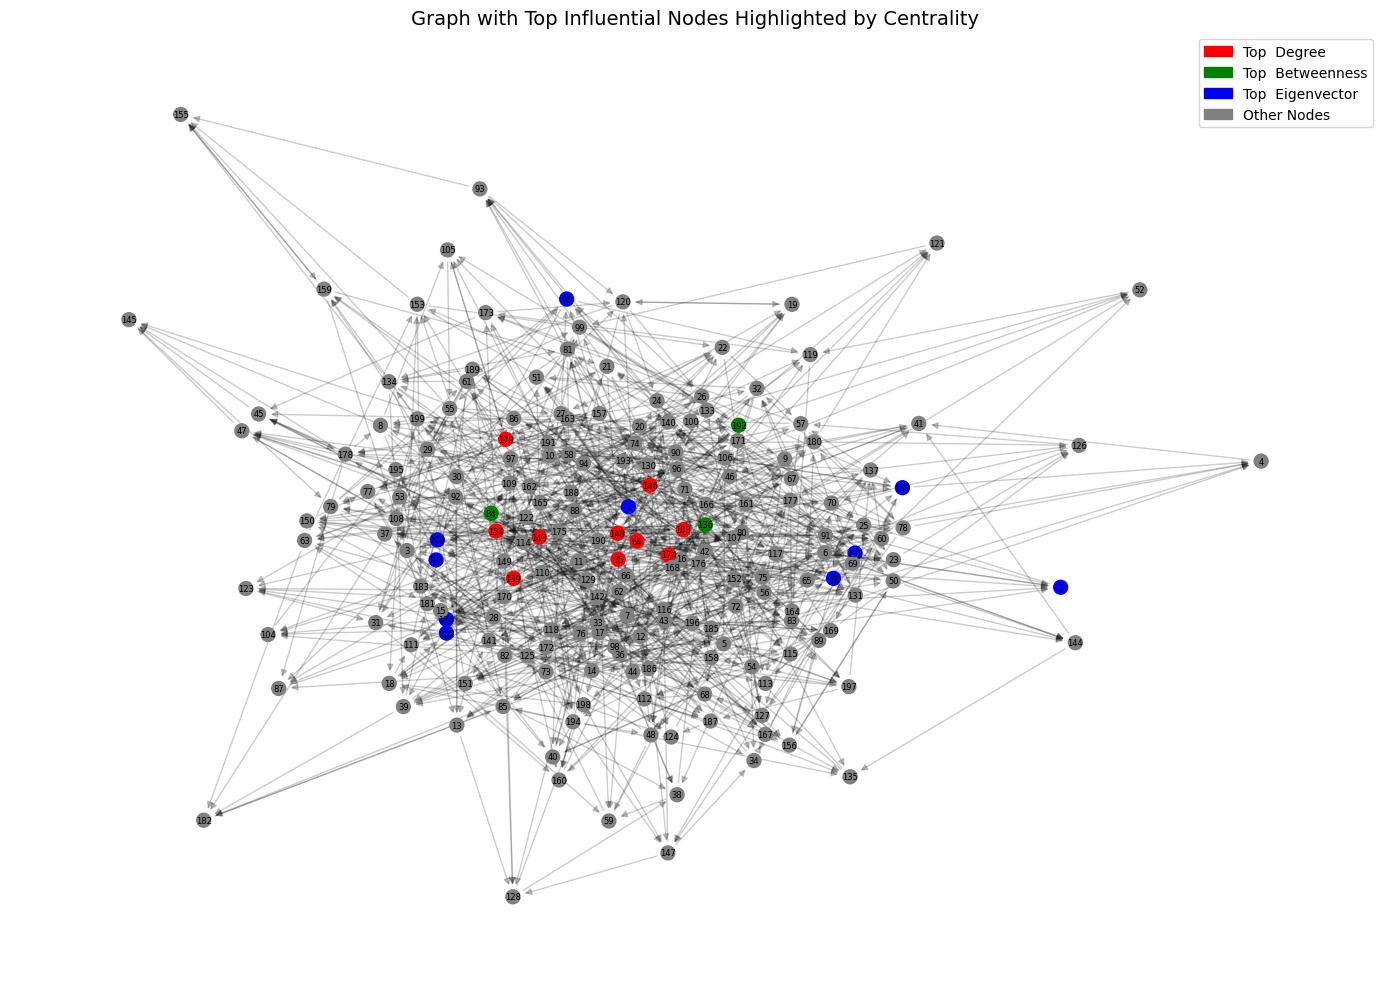

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd

# Create centrality_data list of dictionaries
centrality_data = []
for node in G.nodes():
    centrality_data.append({
        'node': node,
        'out_degree': raw_out_degrees.get(node, 0),
        'betweenness': betweenness.get(node, 0.0),
        'eigenvector': eigenvector_all.get(node, 0.0)
    })

# Convert the list of dictionaries to a pandas DataFrame
centrality_df = pd.DataFrame(centrality_data)

# Get top 10 nodes for coloring based on the DataFrame
top_out_degree_nodes = set(centrality_df.nlargest(10, 'out_degree')['node'])
top_betweenness_nodes = set(centrality_df.nlargest(10, 'betweenness')['node'])
top_eigenvector_nodes = set(centrality_df.nlargest(10, 'eigenvector')['node'])

# Assign node colors
node_colors = []
for node in G.nodes():
    if node in top_out_degree_nodes:
        node_colors.append("red")
    elif node in top_betweenness_nodes:
        node_colors.append("green")
    elif node in top_eigenvector_nodes:
        node_colors.append("blue")
    else:
        node_colors.append("gray")

# Layout for visualization
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=100)
nx.draw_networkx_edges(G, pos, alpha=0.2, arrows=True)
nx.draw_networkx_labels(G, pos, font_size=6)

# Custom legend
legend_elements = [
    Patch(color='red', label='Top  Degree'),
    Patch(color='green', label='Top  Betweenness'),
    Patch(color='blue', label='Top  Eigenvector'),
    Patch(color='gray', label='Other Nodes'),
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=10)

plt.title("Graph with Top Influential Nodes Highlighted by Centrality", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Ensure the graph is directed
if not isinstance(G, nx.DiGraph):
    G = G.to_directed()

# Out-degree for each node
out_degrees = dict(G.out_degree())

# Betweenness centrality (works for directed graphs)
betweenness = nx.betweenness_centrality(G, normalized=True)

# Eigenvector centrality — based on influence via in-edges
try:
    eigenvector = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-06)
except nx.PowerIterationFailedConvergence:
    print("Eigenvector centrality did not converge.")
    eigenvector = {}

# Combine into list of node metrics
centrality_data = []
for node in G.nodes():
    centrality_data.append({
        "node": node,
        "out_degree": out_degrees.get(node, 0),
        "betweenness": betweenness.get(node, 0.0),
        "eigenvector": eigenvector.get(node, 0.0)
    })

# Print the result
for data in centrality_data:
    print(data)

{'node': 1, 'out_degree': 8, 'betweenness': 0.015241496612164408, 'eigenvector': 0.07071067811865475}
{'node': 49, 'out_degree': 3, 'betweenness': 0.008401427634165584, 'eigenvector': 0.07071067811865475}
{'node': 95, 'out_degree': 4, 'betweenness': 0.00946386529168945, 'eigenvector': 0.07071067811865475}
{'node': 101, 'out_degree': 5, 'betweenness': 0.013747346013330726, 'eigenvector': 0.07071067811865475}
{'node': 102, 'out_degree': 6, 'betweenness': 0.01305746383906185, 'eigenvector': 0.07071067811865475}
{'node': 132, 'out_degree': 5, 'betweenness': 0.011458669052853511, 'eigenvector': 0.07071067811865475}
{'node': 138, 'out_degree': 6, 'betweenness': 0.013395914243931639, 'eigenvector': 0.07071067811865475}
{'node': 184, 'out_degree': 5, 'betweenness': 0.011714776343040285, 'eigenvector': 0.07071067811865475}
{'node': 200, 'out_degree': 5, 'betweenness': 0.011470652320111909, 'eigenvector': 0.07071067811865475}
{'node': 2, 'out_degree': 2, 'betweenness': 0.004606754805264062, 'eig

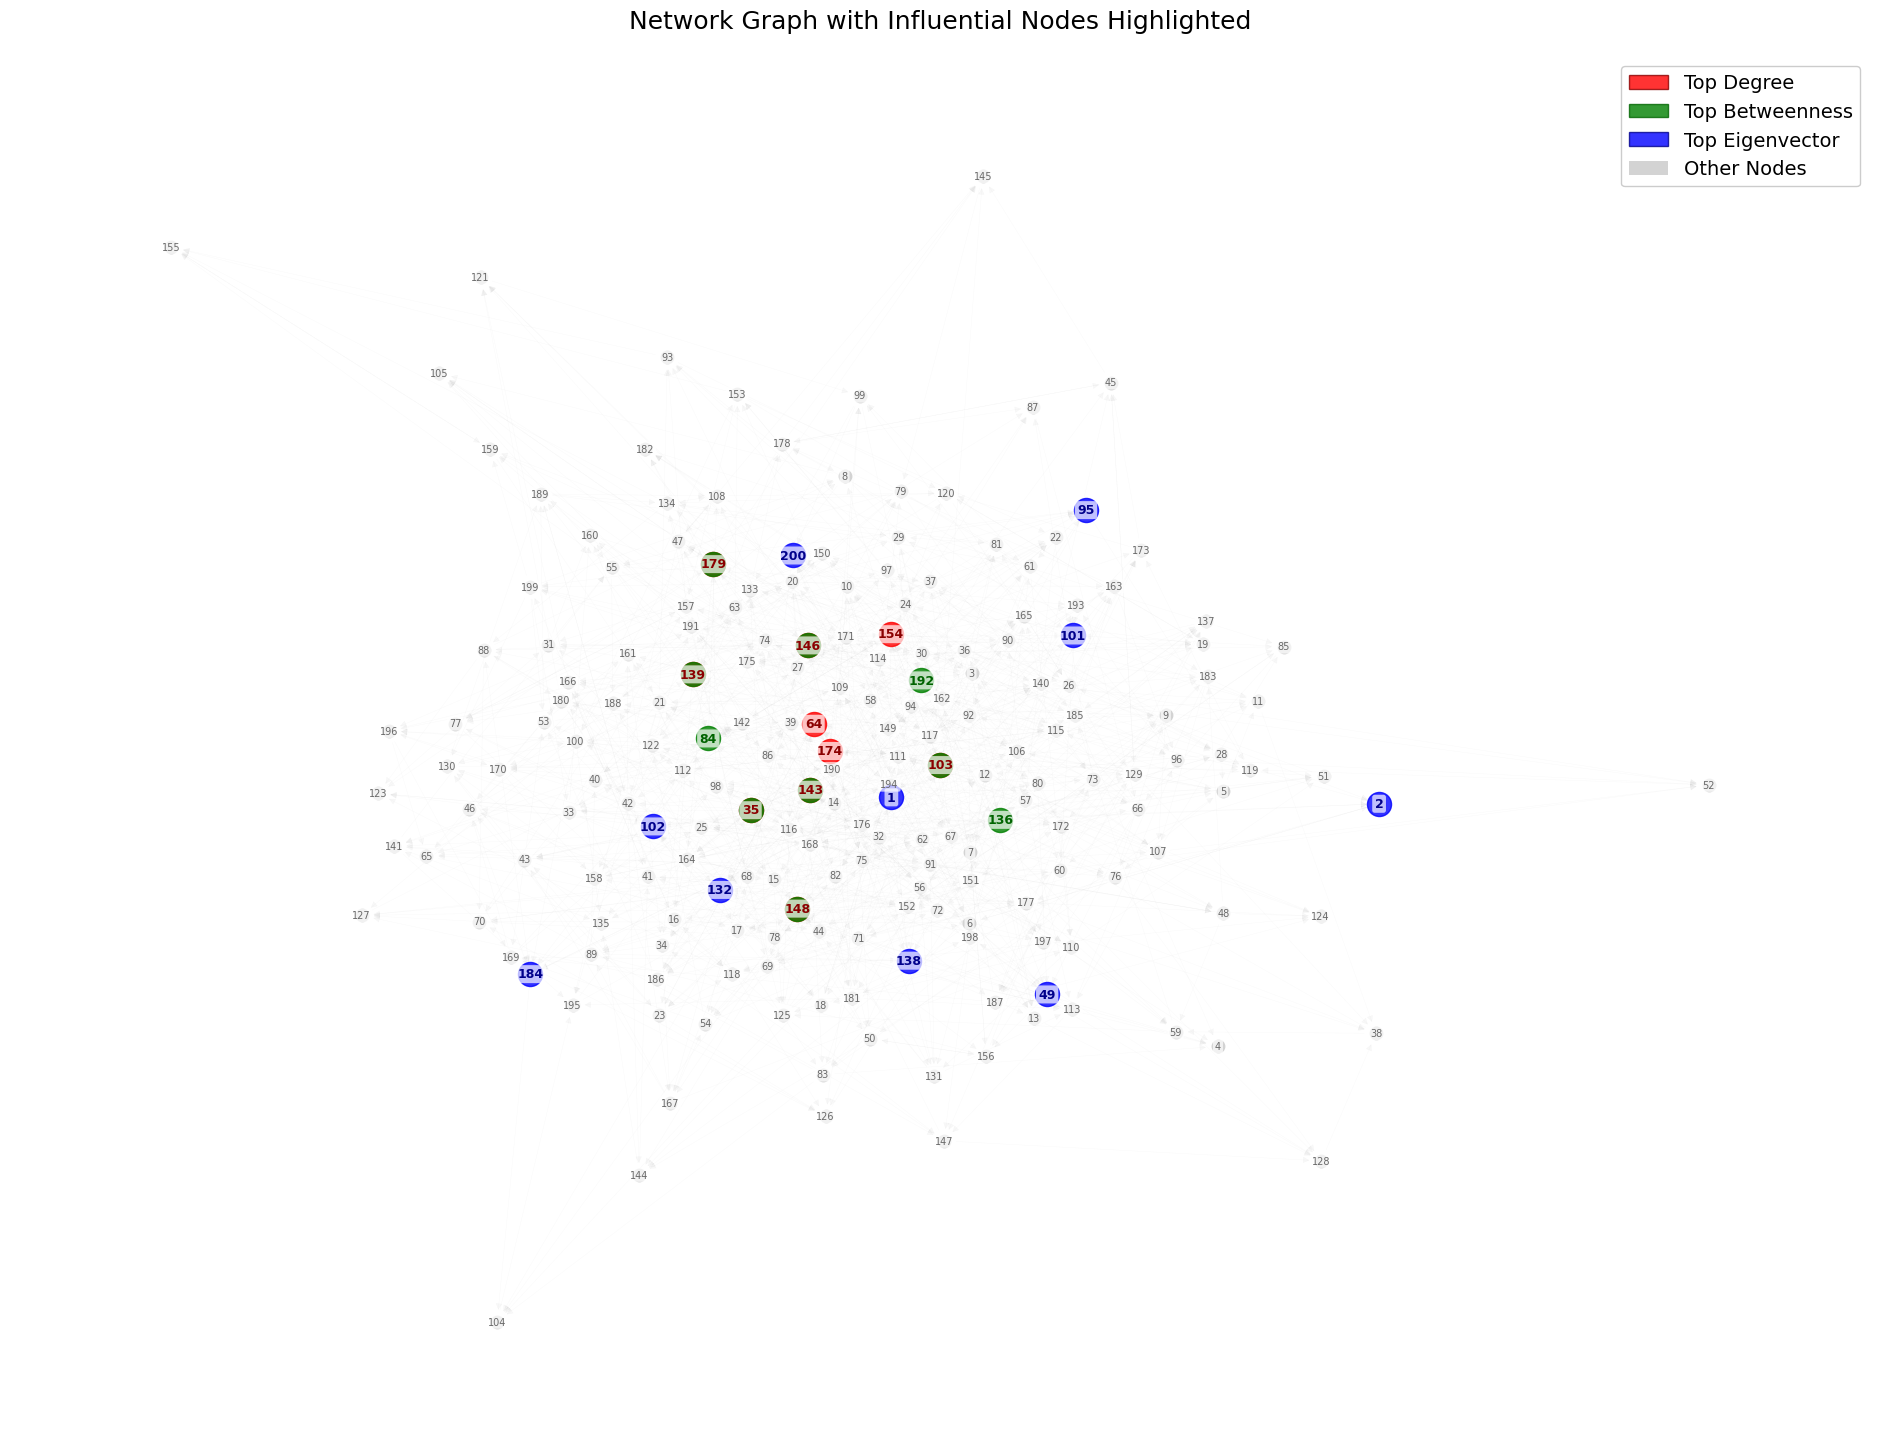

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import networkx as nx

# Assuming G is your graph and centrality measures are calculated

# Enhanced layout with more space
pos = nx.spring_layout(G, seed=42, k=0.3, iterations=200, scale=3)

# Create figure with white background
plt.figure(figsize=(24, 18), facecolor='white')

# Draw edges first (lighter and thinner)
nx.draw_networkx_edges(G, pos, alpha=0.05, width=0.3, edge_color='gray', arrows=True)

# Draw all nodes (gray by default)
nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=80)

# Highlight influential nodes with larger size and colors
nx.draw_networkx_nodes(G, pos, nodelist=list(top_out_degree_nodes),
                      node_color='red', node_size=300, alpha=0.8)
nx.draw_networkx_nodes(G, pos, nodelist=list(top_betweenness_nodes),
                      node_color='green', node_size=300, alpha=0.8)
nx.draw_networkx_nodes(G, pos, nodelist=list(top_eigenvector_nodes),
                      node_color='blue', node_size=300, alpha=0.8)

# Label all nodes with different styles for influential ones
for node in G.nodes():
    if node in top_out_degree_nodes:
        color = 'darkred'
        weight = 'bold'
        size = 9
    elif node in top_betweenness_nodes:
        color = 'darkgreen'
        weight = 'bold'
        size = 9
    elif node in top_eigenvector_nodes:
        color = 'darkblue'
        weight = 'bold'
        size = 9
    else:
        color = 'dimgray'
        weight = 'normal'
        size = 7

    plt.text(pos[node][0], pos[node][1], node,
             fontsize=size, color=color,
             ha='center', va='center',
             fontweight=weight,
             bbox=dict(facecolor='white', alpha=0.7,
                      edgecolor='none', boxstyle='round,pad=0.2'))

# Enhanced legend
legend_elements = [
    Patch(facecolor='red', edgecolor='darkred', label='Top Degree', alpha=0.8),
    Patch(facecolor='green', edgecolor='darkgreen', label='Top Betweenness', alpha=0.8),
    Patch(facecolor='blue', edgecolor='darkblue', label='Top Eigenvector', alpha=0.8),
    Patch(facecolor='lightgray', label='Other Nodes')
]

plt.legend(handles=legend_elements, loc='upper right', fontsize=14,
           framealpha=1, facecolor='white')

plt.title("Network Graph with Influential Nodes Highlighted",
          fontsize=18, pad=20)
plt.axis("off")

# Save high quality image for poster
plt.savefig('network_poster.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

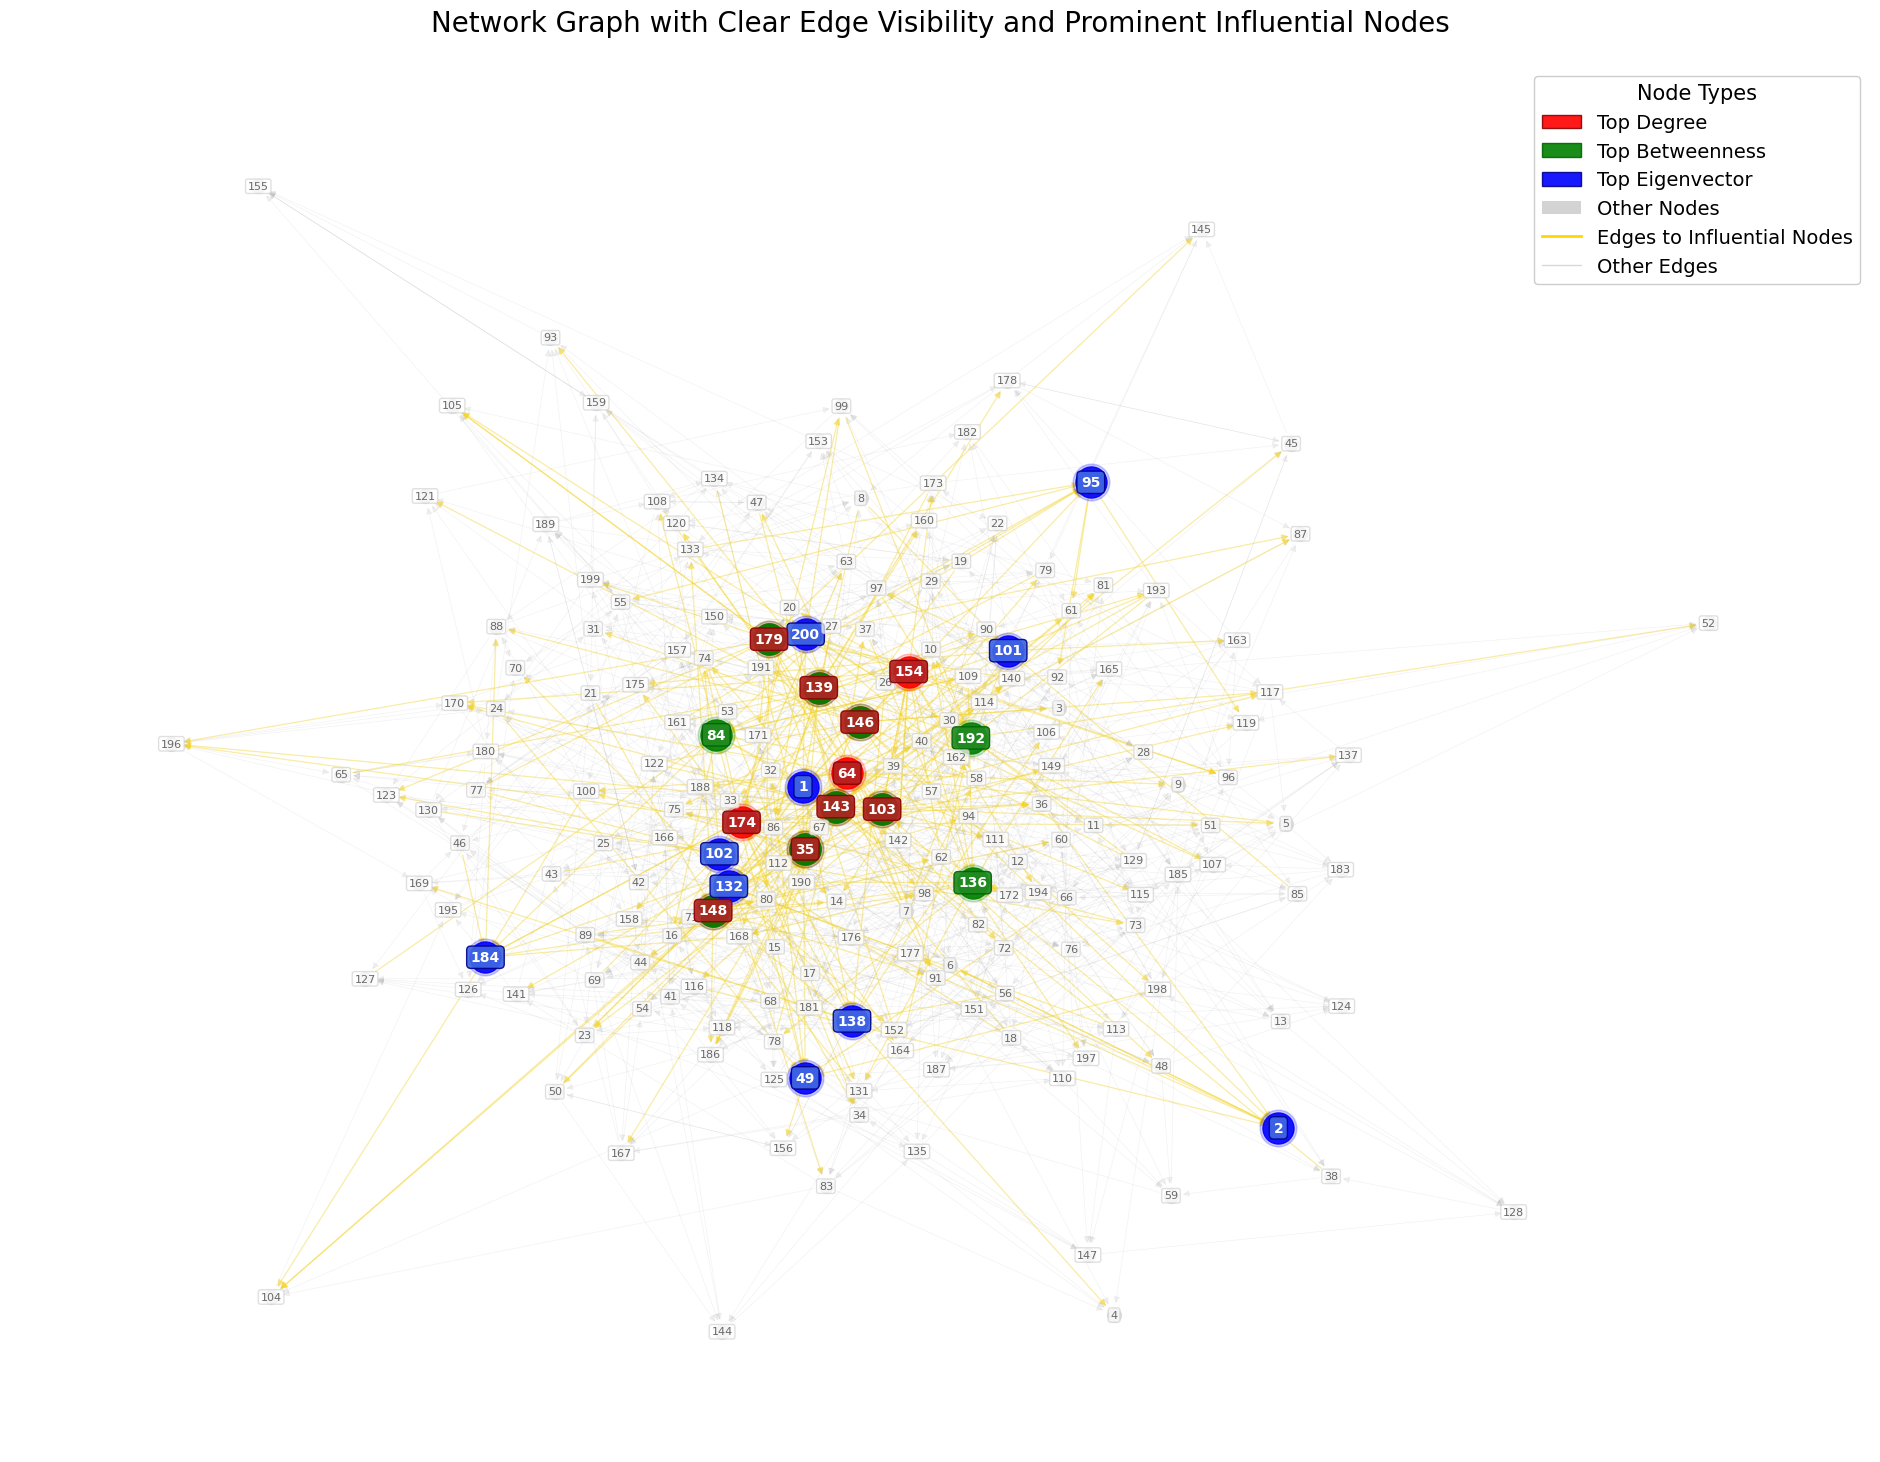

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import networkx as nx

# Assuming G is your graph and centrality measures are calculated

# Enhanced layout with more space
pos = nx.spring_layout(G, seed=42, k=0.4, iterations=300, scale=4)  # Increased parameters for better spacing

# Create figure with white background
plt.figure(figsize=(24, 18), facecolor='white')

# Draw edges with better visibility - two layers
# Base layer: faint edges connecting all nodes
nx.draw_networkx_edges(G, pos, alpha=0.1, width=0.5, edge_color='gray', arrows=True)

# Highlight edges connected to influential nodes
influential_edges = [(u, v) for u, v in G.edges()
                    if u in top_out_degree_nodes.union(top_betweenness_nodes, top_eigenvector_nodes) or
                       v in top_out_degree_nodes.union(top_betweenness_nodes, top_eigenvector_nodes)]
nx.draw_networkx_edges(G, pos, edgelist=influential_edges, alpha=0.3, width=1.0,
                      edge_color='gold', arrows=True)

# Draw all nodes (light gray by default)
nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=100, alpha=0.7)

# Highlight influential nodes with larger size, stronger colors, and edge glow
# Glow effect for influential nodes
for node_list, color in [(top_out_degree_nodes, 'red'),
                         (top_betweenness_nodes, 'green'),
                         (top_eigenvector_nodes, 'blue')]:
    nx.draw_networkx_nodes(G, pos, nodelist=list(node_list),
                          node_color=color, node_size=500, alpha=0.9)
    # Add glow effect
    nx.draw_networkx_nodes(G, pos, nodelist=list(node_list),
                          node_color=color, node_size=700, alpha=0.2)

# Label all nodes with enhanced styling
for node in G.nodes():
    if node in top_out_degree_nodes:
        node_color = 'darkred'
        text_color = 'white'
        weight = 'bold'
        size = 10
        bbox_style = dict(facecolor='firebrick', alpha=0.9,
                         edgecolor='darkred', boxstyle='round,pad=0.3')
    elif node in top_betweenness_nodes:
        node_color = 'darkgreen'
        text_color = 'white'
        weight = 'bold'
        size = 10
        bbox_style = dict(facecolor='forestgreen', alpha=0.9,
                         edgecolor='darkgreen', boxstyle='round,pad=0.3')
    elif node in top_eigenvector_nodes:
        node_color = 'darkblue'
        text_color = 'white'
        weight = 'bold'
        size = 10
        bbox_style = dict(facecolor='royalblue', alpha=0.9,
                         edgecolor='darkblue', boxstyle='round,pad=0.3')
    else:
        node_color = 'lightgray'
        text_color = 'dimgray'
        weight = 'normal'
        size = 8
        bbox_style = dict(facecolor='white', alpha=0.7,
                         edgecolor='lightgray', boxstyle='round,pad=0.2')

    plt.text(pos[node][0], pos[node][1], node,
             fontsize=size, color=text_color,
             ha='center', va='center',
             fontweight=weight,
             bbox=bbox_style)

# Enhanced legend with edge representation
legend_elements = [
    Patch(facecolor='red', edgecolor='darkred', label='Top Degree', alpha=0.9),
    Patch(facecolor='green', edgecolor='darkgreen', label='Top Betweenness', alpha=0.9),
    Patch(facecolor='blue', edgecolor='darkblue', label='Top Eigenvector', alpha=0.9),
    Patch(facecolor='lightgray', label='Other Nodes'),
    plt.Line2D([0], [0], color='gold', lw=2, label='Edges to Influential Nodes'),
    plt.Line2D([0], [0], color='gray', lw=1, alpha=0.3, label='Other Edges')
]

plt.legend(handles=legend_elements, loc='upper right', fontsize=14,
           framealpha=1, facecolor='white', title='Node Types', title_fontsize=15)

plt.title("Network Graph with Clear Edge Visibility and Prominent Influential Nodes",
          fontsize=20, pad=25)
plt.axis("off")

# Save high quality image for poster
plt.savefig('network_poster_enhanced.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

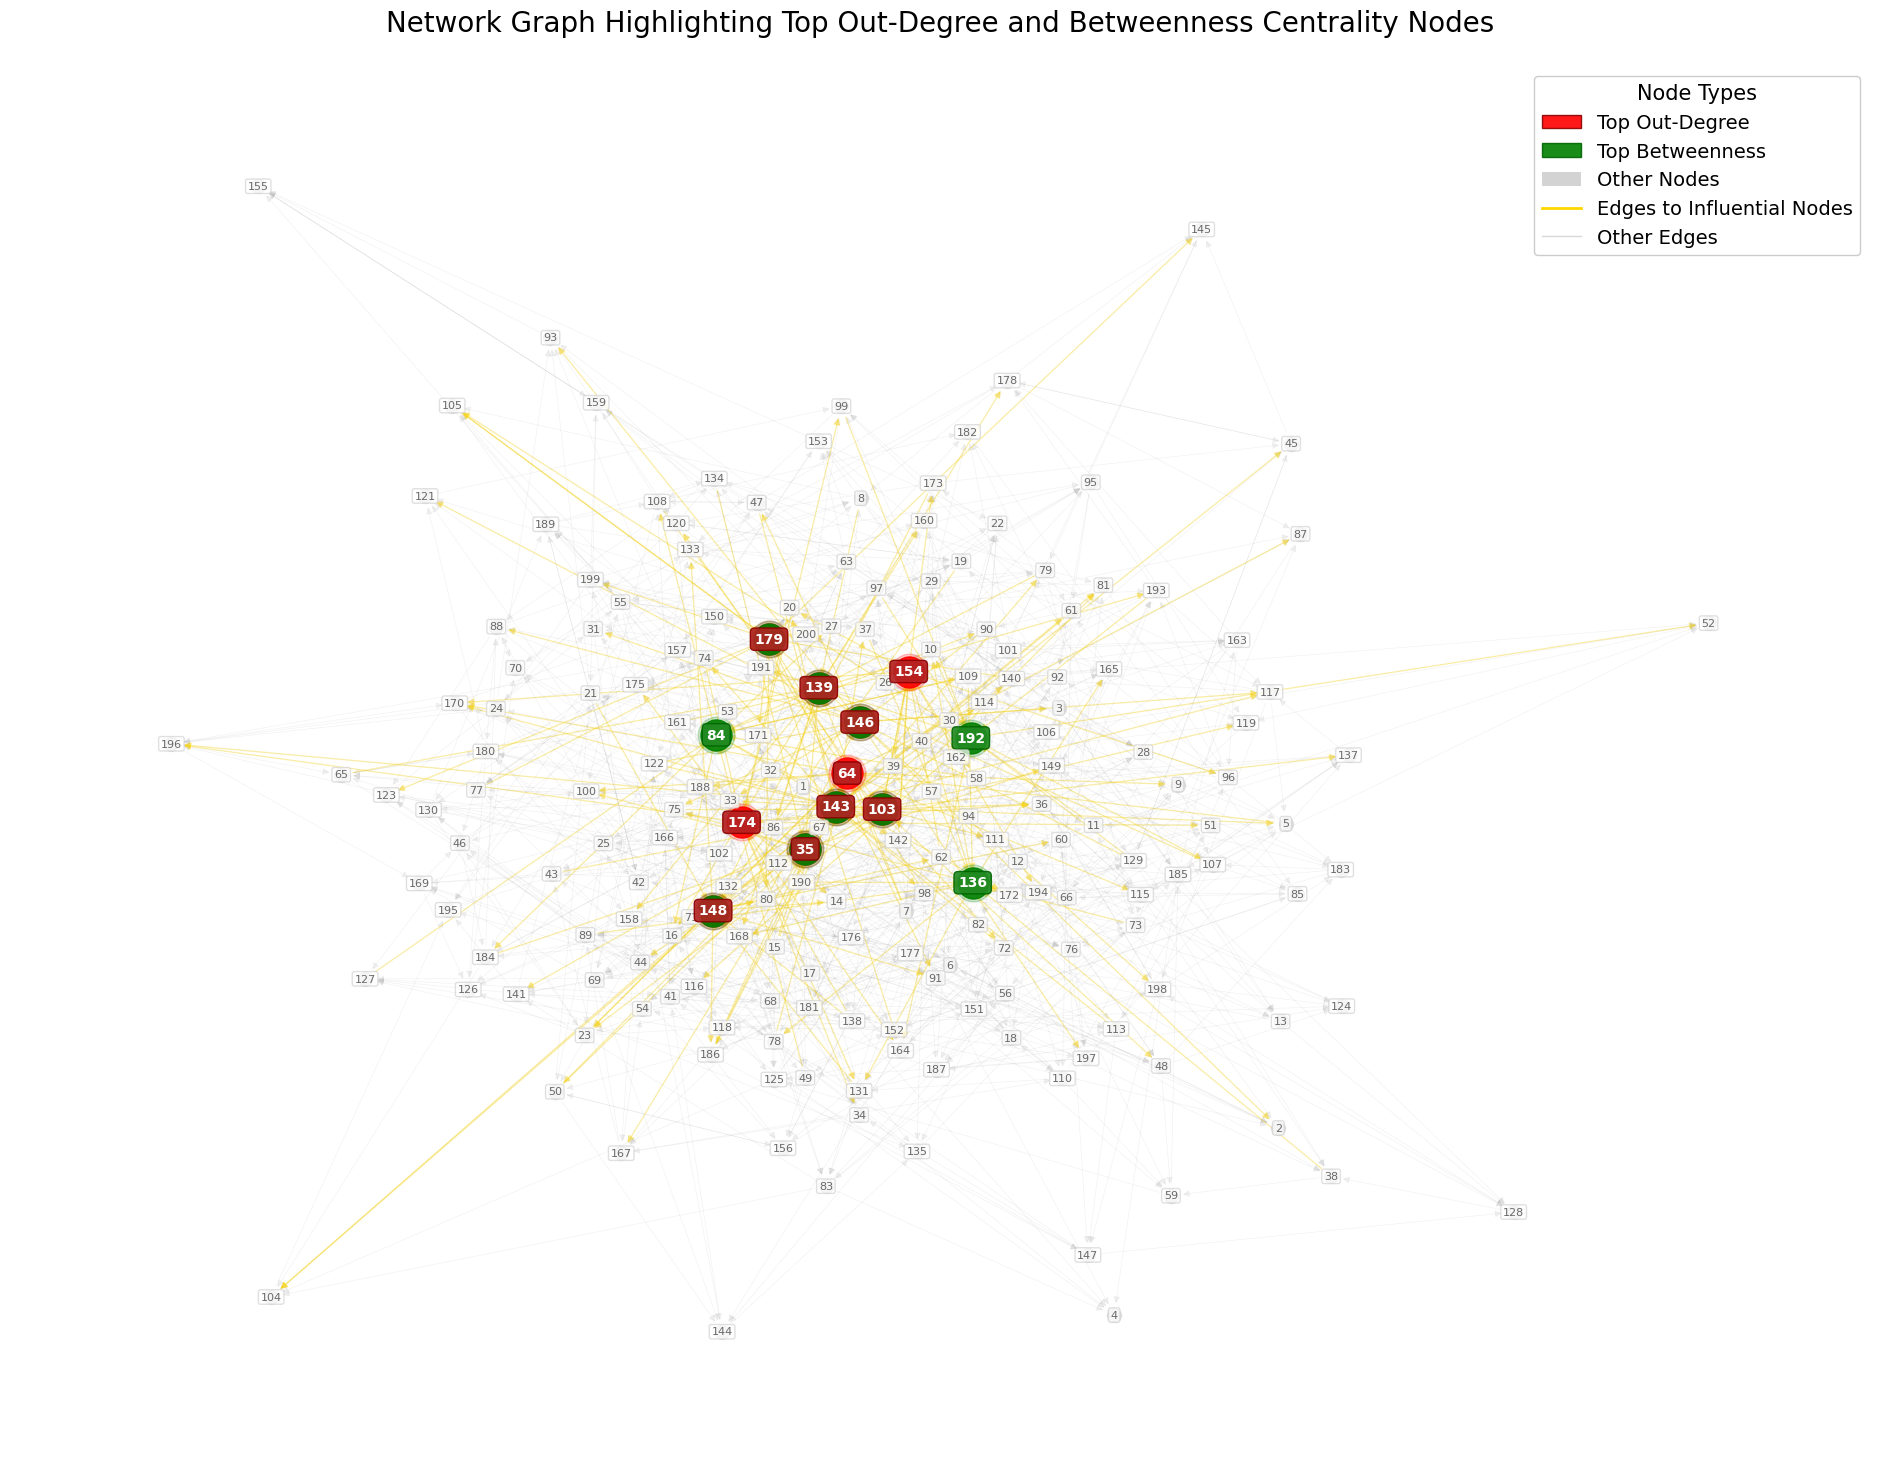

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import networkx as nx

# Compute centrality measures
out_degree_dict = dict(G.out_degree())
betweenness_dict = nx.betweenness_centrality(G)

# Identify top-10 nodes for each metric
top_out_degree_nodes = set(sorted(out_degree_dict, key=out_degree_dict.get, reverse=True)[:10])
top_betweenness_nodes = set(sorted(betweenness_dict, key=betweenness_dict.get, reverse=True)[:10])
highlight_nodes = top_out_degree_nodes.union(top_betweenness_nodes)

# Layout configuration
pos = nx.spring_layout(G, seed=42, k=0.4, iterations=300, scale=4)

# Create figure
plt.figure(figsize=(24, 18), facecolor='white')

# Draw base edges faintly
nx.draw_networkx_edges(G, pos, alpha=0.1, width=0.5, edge_color='gray', arrows=True)

# Draw edges connected to influential nodes
influential_edges = [(u, v) for u, v in G.edges()
                     if u in highlight_nodes or v in highlight_nodes]
nx.draw_networkx_edges(G, pos, edgelist=influential_edges, alpha=0.3, width=1.0,
                       edge_color='gold', arrows=True)

# Draw all nodes as background
nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=100, alpha=0.7)

# Highlight top nodes
for node_list, color in [(top_out_degree_nodes, 'red'),
                         (top_betweenness_nodes, 'green')]:
    nx.draw_networkx_nodes(G, pos, nodelist=list(node_list),
                           node_color=color, node_size=500, alpha=0.9)
    # Glow effect
    nx.draw_networkx_nodes(G, pos, nodelist=list(node_list),
                           node_color=color, node_size=700, alpha=0.2)

# Label nodes
for node in G.nodes():
    if node in top_out_degree_nodes:
        node_color = 'darkred'
        text_color = 'white'
        weight = 'bold'
        size = 10
        bbox_style = dict(facecolor='firebrick', alpha=0.9,
                          edgecolor='darkred', boxstyle='round,pad=0.3')
    elif node in top_betweenness_nodes:
        node_color = 'darkgreen'
        text_color = 'white'
        weight = 'bold'
        size = 10
        bbox_style = dict(facecolor='forestgreen', alpha=0.9,
                          edgecolor='darkgreen', boxstyle='round,pad=0.3')
    else:
        text_color = 'dimgray'
        weight = 'normal'
        size = 8
        bbox_style = dict(facecolor='white', alpha=0.7,
                          edgecolor='lightgray', boxstyle='round,pad=0.2')

    plt.text(pos[node][0], pos[node][1], node,
             fontsize=size, color=text_color,
             ha='center', va='center',
             fontweight=weight,
             bbox=bbox_style)

# Custom legend
legend_elements = [
    Patch(facecolor='red', edgecolor='darkred', label='Top Out-Degree', alpha=0.9),
    Patch(facecolor='green', edgecolor='darkgreen', label='Top Betweenness', alpha=0.9),
    Patch(facecolor='lightgray', label='Other Nodes'),
    plt.Line2D([0], [0], color='gold', lw=2, label='Edges to Influential Nodes'),
    plt.Line2D([0], [0], color='gray', lw=1, alpha=0.3, label='Other Edges')
]

plt.legend(handles=legend_elements, loc='upper right', fontsize=14,
           framealpha=1, facecolor='white', title='Node Types', title_fontsize=15)

plt.title("Network Graph Highlighting Top Out-Degree and Betweenness Centrality Nodes",
          fontsize=20, pad=25)
plt.axis("off")

# Save image
plt.savefig('network_top10_highlighted.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
